In [1]:
# 설치확인
import cv2

이미지 파일 불러오기

In [2]:
# cv2.imread() : 이미지 파일을 읽는 함수
img = cv2.imread("./image/ryan.jpg")

# 새 창을 띄워서 읽은 이미지를 출력
cv2.imshow("ryan", img)

# 키보드의 키를 아무키나 누를때까지 무한정 기다린다
cv2.waitKey(0)
# OpenCV에서 열어준 모든 창을 닫아준다
cv2.destroyAllWindows()

불러온 이미지를 Matplotlib를 이용해서 출력

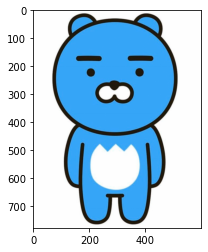

In [4]:
import matplotlib.pyplot as plt

img = cv2.imread("./image/ryan.jpg")

plt.imshow(img)

# 파이썬에서는 색상공간을 BGR을 사용 - Red와 Blue 바뀐 형태

([], [])

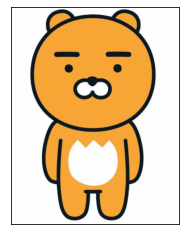

In [8]:
# Red와 Green을 서로 바꾸기 -> cv2.cvtColor()
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.imshow(img2)

# 눈금 지우기
plt.xticks([])
plt.yticks([])

이미지의 색상 종류

- 칼라이미지 : RGB (Red, Green, Blue) 
  - 각 색상은 8비트 (0-255)의 픽셀로 구성
  - 24비트 -> 트루 칼라
  - Windows -> 32비트 칼라 -> ARGB (A : 투명도)
  
- 흑백이미지 : 0-255 픽셀로 구성된 이미지 (gray scale 이미지)
- 이진이미지 : 0과 255 픽셀로만 구성된 이미지 (binary 이미지)

칼라이미지 -> gray 이미지

- 이미지를 읽을 때 gray 이미지로 바로 변환해서 읽는 방법
- 칼라이미지로 읽어서 gray 이미지로 변환하는 방법
  - 칼라이미지가 최종 출력에 필요한 경우

([], [])

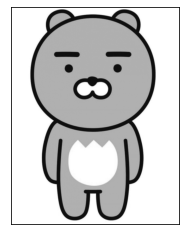

In [10]:
# 이미지를 읽을 때 gray 이미지로 바로 변환해서 읽는 방법
gray_img = cv2.imread("./image/ryan.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_img, cmap="gray")
plt.xticks([])
plt.yticks([])

([], [])

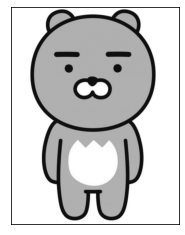

In [5]:
# 칼라이미지로 읽어서 gray 이미지로 변환하는 방법
# 이미지를 읽을때 RGB를 BGR로 변환해서 읽는다
color_img = cv2.imread("./image/ryan.jpg", cv2.COLOR_RGB2BGR)

# 칼라이미지를 gray이미지로 변환
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap="gray")
plt.xticks([])
plt.yticks([])

이진이미지로 변환

- 필터링, 마스크 씌울때 사용

([], [])

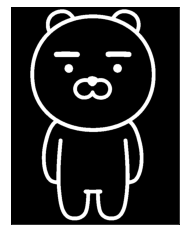

In [6]:
# threshold(흑백이미지, 기준값, 할당값, 옵션) : 이진 이미지로 변환
# cv2.THRESH_BINARY : 기준값보다 크면 할당값으로 설정
# cv2.THRESH_BINARY_INV : 기준값보다 작으면 할당값으로 설정
_, binary_img = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary_img, cmap="gray")
plt.xticks([])
plt.yticks([])

동영상 읽기

In [31]:
# 동영상 파일 가져오기
try : 
    print("동영상 읽기 시작")
    #cap = cv2.VideoCapture("./image/video.mp4")
    
    # 카메라로부터 영상을 입력을 받아온다.
    cap = cv2.VideoCapture(0)
except :
    print("동영상 불러오기 실패")
    
# 동영상 파일 읽기
# 초당 30프레임 이미지로 구성
while True :
    # 동영상으로부터 이미지를 하나씩 읽어서 frame에 저장
    # 잘 읽었으면 ret에 True를 반환
    ret, frame = cap.read()
    
    if not ret :    # 이미지 읽기를 실패했다면 (파일에 문제가 있거나 다 읽음)
        print("이미지 읽기 실패 또는 모두 읽음")
        # 비디오 종료
        cap.release()
        # 실행창 종료
        cv2.destroyAllWindows()
        # 반복문 종료
        break
        
    # 출력
    cv2.imshow("animation", frame)
    
    # 초당 30프레임을 읽을려면 0.033마다 대기
    k = cv2.waitKey(33)
    
    if k == 49 :  #ASCII 코드로 1을 의미 (1을 누르면) 
        print("종료합니다")
        # 비디오 종료
        cap.release()
        # 실행창 종료
        cv2.destroyAllWindows()
        # 반복문 종료
        break   

동영상 읽기 시작
종료합니다


녹화하기

In [32]:
try : 
    print("동영상 읽기 시작")
    #cap = cv2.VideoCapture("./image/video.mp4")    
    cap = cv2.VideoCapture(0)
except :
    print("동영상 불러오기 실패")
    
# 녹화 환경 설정 (속도, 크기, 코덱)
fps = 30     # 초당 30장 이미지를 저장
w = int(cap.get(3))    # 입력이미지의 가로크기
h = int(cap.get(4))    # 입력이미지의 세로크기
# 코덱
fcc = cv2.VideoWriter_fourcc(*"DIVX")    #avi 파일로 저장
# 녹화 설정
out = cv2.VideoWriter("./image/cctv.avi", fcc, fps, (w, h))

# 녹화여부
recode = False
    
while True :
    ret, frame = cap.read()
    
    if not ret :   
        print("이미지 읽기 실패 또는 모두 읽음")
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow("animation", frame)
    
    # 녹화화기
    if recode :
        out.write(frame)
    
    k = cv2.waitKey(33)
    
    if k == 49 :  
        print("종료합니다")
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break   
        
    if k == 50 : # 2를 누르면 녹화 시작
        recode = True
        print("녹화 시작")

동영상 읽기 시작
녹화 시작
종료합니다


한 장씩 이미지를 저장

In [2]:
try : 
    print("동영상 읽기 시작")
    #cap = cv2.VideoCapture("./image/video.mp4")    
    cap = cv2.VideoCapture(0)
except :
    print("동영상 불러오기 실패")
    
co = 0  # 파일 이름용 인덱스

while True :
    ret, frame = cap.read()
    
    if not ret :   
        print("이미지 읽기 실패 또는 모두 읽음")
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow("animation", frame)
    
    k = cv2.waitKey(33)
    
    if k == 49 :  
        print("종료합니다")
        cap.release()
        cv2.destroyAllWindows()
        break   
        
    # 이미지 한장 저장하기
    if k == 50 :
        co = co + 1
        print("./image/cctv{}.jpg 파일 저장".format(co))
        # v2.IMWRITE_PNG_COMPRESSION : png 파일로 압축해서 저장
        # 0 : 압축율 (0-9) - 0은 압축하지 않음
        cv2.imwrite("./image/cctv{}.jpg".format(co), frame, 
                    params=[cv2.IMWRITE_JPEG_PROGRESSIVE, 0])

동영상 읽기 시작
./image/cctv1.jpg 파일 저장
./image/cctv2.jpg 파일 저장
./image/cctv3.jpg 파일 저장
./image/cctv4.jpg 파일 저장
./image/cctv5.jpg 파일 저장
./image/cctv6.jpg 파일 저장
./image/cctv7.jpg 파일 저장
./image/cctv8.jpg 파일 저장
./image/cctv9.jpg 파일 저장
./image/cctv10.jpg 파일 저장
./image/cctv11.jpg 파일 저장
./image/cctv12.jpg 파일 저장
./image/cctv13.jpg 파일 저장
./image/cctv14.jpg 파일 저장
./image/cctv15.jpg 파일 저장
./image/cctv16.jpg 파일 저장
./image/cctv17.jpg 파일 저장
./image/cctv18.jpg 파일 저장
./image/cctv19.jpg 파일 저장
./image/cctv20.jpg 파일 저장
./image/cctv21.jpg 파일 저장
./image/cctv22.jpg 파일 저장
종료합니다


여러장의 이미지로 동영상 만들기

In [5]:
import cv2

# 녹화 설정
fps = 1.0   # 초당 1장 이미지가 출력
w = 640
h = 480
fcc = cv2.VideoWriter_fourcc(*"DIVX")
out = cv2.VideoWriter("./image/movie01.avi", fcc, fps, (w, h))

# 저장된 파일을 한장씩 읽어와서 동영상으로 만듬
for i in range(1, 23) :
    # 이미지 읽기
    img = cv2.imread("./image/cctv{}.jpg".format(i), cv2.IMREAD_COLOR)
    
    out.write(img)
    #cv2.waitKey(1000)      # 1초에 한장씩 플레이
    
out.release()    # 파일 해제

이미지 처리

- 픽셀 기반 처리 : 픽셀 하나하나를 가지고 처리하는 방법
  - 근처 픽셀과의 관계는 알수 있지만 전체적인 이미지를 분석하기는 힘듬
  - 속도가 느림
- 블록 기반 처리 : 블록 (픽셀의 묶음)을 기반으로 처리하는 방법
  - 전체적인 이미지를 분석할 수 있음, 속도가 빠름
- 주파수 기반 처리 
  - 시각에서 색상을 잘못 판단하는 경우가 많음 (명도, 채도로 인한 문제)
  - 명도 : 밝기 (검정색의 양) - 빛에 따라서 색상 변함
  - 채도 : 분순도 (흰색의 양) - 색이 바램, 오래되면 색이 흐려지는 것
  - 픽셀, 블록 (색상 기반) - 왜곡을 많이 줌
  - 주파수 기반 처리
  
  - 주파수 ? : 픽셀의 변화분 
    - 고주파 : 픽셀값이 크게 변하는 부분
    - 저주파 : 픽셀값이 작게 변하는 부분
    - 이미지에는 저주파 영역이 훨씬 많음
    - 이미지의 특성은 고주파 영역에 훨씬 많음

픽셀값 불러오기

In [11]:
import cv2

img = cv2.imread("./image/ryan.jpg")

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img[200, 100]

# red, grean, blue

array([247, 165,  53], dtype=uint8)

픽셀값 변경하기

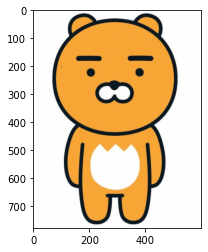

In [13]:
import matplotlib.pyplot as plt

img[200, 100] = [0, 0, 0]
img[200, 101] = [0, 0, 0]
img[201, 100] = [0, 0, 0]
img[201, 101] = [0, 0, 0]

plt.imshow(img)

이미지의 정보 출력

In [15]:
# 이미지의 크기
print(img.shape)

# 세로, 가로, 색상 (3 : 칼라, 1 : 흑백)

# 출력을 할때는 (가로, 세로) 로 출력

(777, 600, 3)


In [16]:
# 픽셀의 수
print(img.size)

1398600


In [18]:
# 픽셀의 데이터 타입
print(img.dtype)

# unsinged integer 8비트 : 8비트 구성된 양의 정수 (0-255)

uint8


ROI (Region of Image) : 전체 이미지에서 필요한 부분 이미지 (관심 영역)

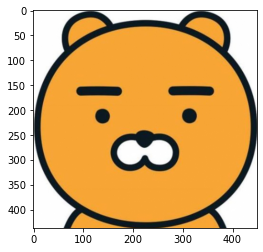

In [34]:
# ROI만 잘라서 표시
import cv2

img = cv2.imread("./image/ryan.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# 행(세로)과 열(가로)
roiimg = img[10:447, 67:516]

plt.imshow(roiimg)

ROI를 원래 이미지에 표시

- cv2.rectangle(이미지, 좌상단좌표, 우하단좌표, 색상, 선두께)
- cv2.putText(이미지, 출력내용, 출력좌표, 폰트, 글씨크기, 색상, 선두께)

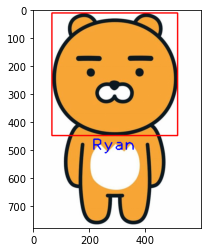

In [42]:
img = cv2.imread("./image/ryan.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

roiimg = cv2.rectangle(img, (67, 10), (516, 447), (255, 0, 0), 3)
roiimg = cv2.putText(roiimg, "Ryan", (209, 500), 
                     cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 255), 3)

plt.imshow(roiimg)

한글 출력하기

- 한글 폰트를 가져오기
- 이미지 배열을 파이썬 이미지로 변환
- 파이썬 이미지에 한글 글씨를 추가
- 파이썬 이미지를 배열로 변환

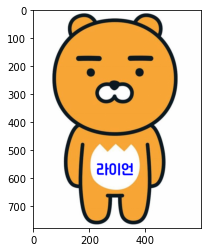

In [49]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np

img = cv2.imread("./image/ryan.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# 한글 폰트 가져오기 (폰트, 폰트 크기)
font = ImageFont.truetype("./image/HGSoftGGothicssi 80g.ttf",50)

# 이미지 배열을 파이썬 이미지로 변환
pimg = Image.fromarray(img)
draw = ImageDraw.Draw(pimg)

# 파이썬 이미지에 한글 글씨를 추가
# 좌표, 내용, fill=(폰트 색상, 투명도)
draw.text((225, 540), "라이언", font=font, fill=(0, 0, 255, 0))

# 파이썬 이미지를 배열로 변환
img = np.array(pimg)

plt.imshow(img)

색상 추적

- HSV : Hue(색상), Saturation(채도), Value(명도) 
- 색상 : -180 - 180의 각도로 표시
- 채도, 명도 : 0 - 255범위 값으로 표시

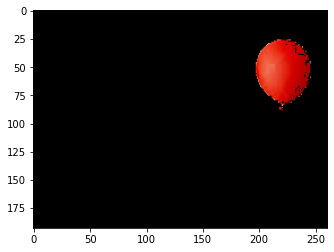

In [55]:
import cv2

img = cv2.imread("./image/balloon.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# BGR 색상을 HSV로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# 색상 / 채도 / 명도 부분을 추출
#   - 파란색 : 100-130
#   - 노란색 : 10-40
#   - 녹색 : 40-70
# 최소값
lower = np.array([-10, 100, 100])
# 최대값
upper = np.array([10, 255, 255])

# 최소값과 최대값를 이용해서 색의 범위를 마스킹
mask = cv2.inRange(hsv, lower, upper)

# 마스크와 이미지를 and 연산 (마스크가 되어 있는 색상만 추출)
img2 = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(img2)

이미지에서 얼굴과 눈을 검출

- HarrCascade 알고리즘을 사용 - 정면얼굴, 눈, 코, 입, 귀 등을 추출하는 알고리즘을 포함 - 정면얼굴과 눈을 추출하는 알고리즘

In [7]:
import cv2
import matplotlib.pyplot as plt

# HarrCascade 알고리즘 가져오기
front_face = cv2.CascadeClassifier("./image/haarcascade_frontalface_default.xml")
eye = cv2.CascadeClassifier("./image/haarcascade_eye.xml")

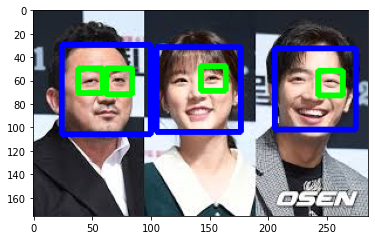

In [16]:
img = cv2.imread("./image/face.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴이미지를 검출
# 스케일 (얼굴의 크기), 거리 (얼굴끼리 얼마 떨어져있는가)
# 얼굴 영역들의 좌표를 반환
faces = front_face.detectMultiScale(gray_img, 1.3, 5)

# 얼굴 영역에 빨간색 사각형을 그린다
for (x, y, w, h) in faces :
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)
    
    # 눈영역 검출 : 얼굴 영역 ROI 기반으로 추출
    # 얼굴 영역의 ROI를 추출
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eyes = eye.detectMultiScale(roi_gray, 1.05, 1)
    
    # 눈 영역 표시
    for (ex, ey, ew, eh) in eyes :
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 3)      
    
plt.imshow(img)

동영상에서 얼굴 영역 찾기

In [19]:
import cv2

try :
    cap = cv2.VideoCapture(0)    
except :
    print("비디오 캡처 에러")
    
while True :
    ret, frame = cap.read()
    
    if not ret :
        cap.release()
        cv2.destroyAllWindows()
        break
        
    #frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)    
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    
    
    faces = front_face.detectMultiScale(gray_img, 1.2, 3)
    
    for (x, y, w, h) in faces :
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
    
        eyes = eye.detectMultiScale(roi_gray, 1.3, 2)
    
        # 눈 영역 표시
        for (ex, ey, ew, eh) in eyes :
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 3)   
        
    cv2.imshow("face", frame)     
    
    k = cv2.waitKey(200)
    
    if k == 49 :
        cap.release()
        cv2.destroyAllWindows()
        break        

OCR (Optical Chractor Recorder) : 광학문자 판독기, 광학문자인식

- 이미지에서 텍스트를 추출하는 기능

- Tesseract API, 구글 OCR, Naver OCR API

- Tesseract API : https://github.com/UB-Mannheim/tesseract/wiki

- 설치시에 Additional language data를 체크하고 설치 (한국어 사용하기 위해)

In [20]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14065 sha256=fe844baeb7b1c409ac386a861884263211d0f2cf6c1abbbfed771282399c8795
  Stored in directory: c:\users\sm2147\appdata\local\pip\cache\wheels\c6\3a\30\877d14dc50fb68f107b18247a31db742518c6f74f64de8dde8
Successfully built pytesseract


In [23]:
# Tesseract 설치 위치를 설정
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [24]:
import cv2

img = cv2.imread("./image/text.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# 텍스트 추출 (lang : 언어설정)
text = pytesseract.image_to_string(img, lang="eng")

print(text)

 

Life is a journey,
not a guided tour.

- Anonymous -



In [26]:
import cv2

img = cv2.imread("./image/story.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# 텍스트 추출 (lang : 언어설정)
text = pytesseract.image_to_string(img, lang="kor")

print(text)

소년

여기저기서 단풍잎 같은 슬픈 가을이 뚝뚝 떨어진다. 단풍잎
떨어져 나온 자리마다 봄을 마련해 놓고 나못가지 위에 하늘이
펼쳐 있다. 가만히 하늘을 들여다보려면 눈썸에 파란 물감이
든다. 두 손으로 따뜻한 볼을 쓸어 보면 손바닥에도 파란 물감
이 묻어난다. 다시 손바닥을 들여다본다. 손금에는 맑은 강물
이 흐르고, 맑은 강물이 흐르고, 강물 속에는 사랑처럼 슬픈 얼
굴ㅡ- 아름다운 순이의 얼굴이 어린다. 소년은 황홀히 눈을
감아 본다. 그래도 맑은 강물은 흘러 사랑처럼 슬픈 얼굴--
아름다운 순이의 얼굴은 어린다.

